```python
import requests
import zipfile
import io

# URL of the dataset
url = 'https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip'
# Download the dataset
response = requests.get(url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall()
        print("Dataset downloaded and extracted successfully.")
else:
    print("Failed to download the dataset.")
```

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SMS/SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Display the first few rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline with a specific model
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Applying sentiment analysis to a sample from the dataset
sample_df = df.sample(n=100, random_state=42)  # Analyze a sample to save processing time
sample_df['sentiment'] = sample_df['message'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Display results
print(sample_df[['label', 'message', 'sentiment']].head())
sentiment_distribution = sample_df['sentiment'].value_counts(normalize=True) * 100
print("\nSentiment Distribution in Sampled Data (%):")
print(sentiment_distribution)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/home/jovyan/work/other_deep_learnings/Huggingface_test/.venv/lib/python3.9/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


     label                                            message sentiment
3245   ham  Squeeeeeze!! This is christmas hug.. If u lik ...  NEGATIVE
944    ham  And also I've sorta blown him off a couple tim...  NEGATIVE
1044   ham  Mmm thats better now i got a roast down me! i...  POSITIVE
2484   ham      Mm have some kanji dont eat anything heavy ok  NEGATIVE
812    ham  So there's a ring that comes with the guys cos...  POSITIVE

Sentiment Distribution in Sampled Data (%):
sentiment
NEGATIVE    63.0
POSITIVE    37.0
Name: proportion, dtype: float64


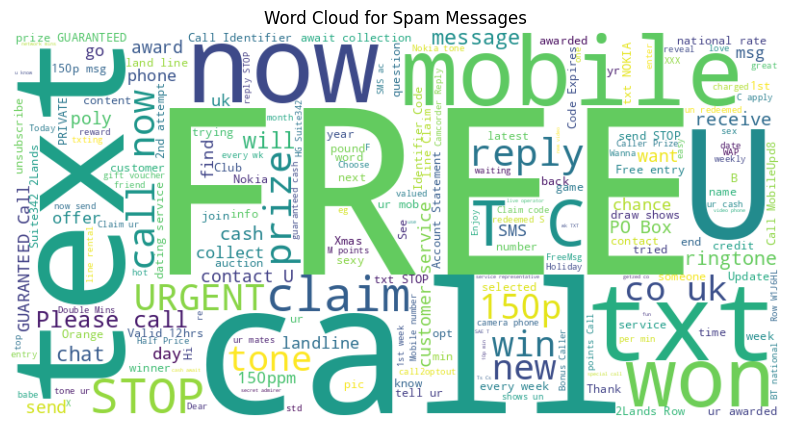

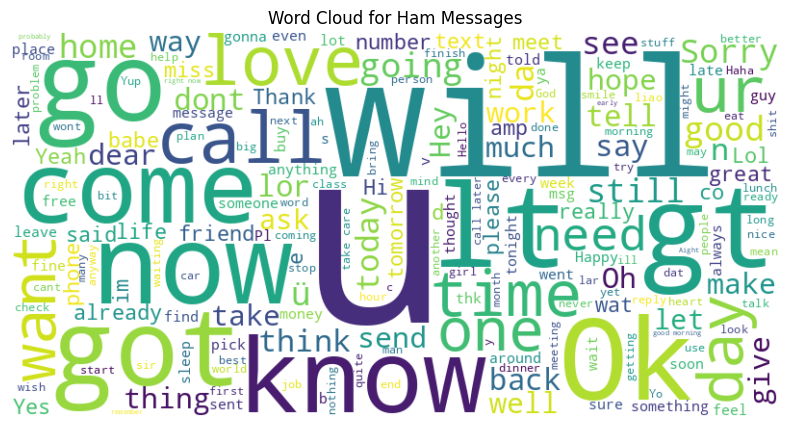

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the uploaded dataset
file_path = 'SMS/SMSSpamCollection'

# Read the file and separate messages based on type (ham or spam)
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Split data into spam and ham categories
spam_messages = []
ham_messages = []

for line in lines:
    label, message = line.strip().split('\t', 1)
    if label == 'spam':
        spam_messages.append(message)
    else:
        ham_messages.append(message)

# Generate word clouds for each category
spam_text = ' '.join(spam_messages)
ham_text = ' '.join(ham_messages)

# Word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Word cloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()


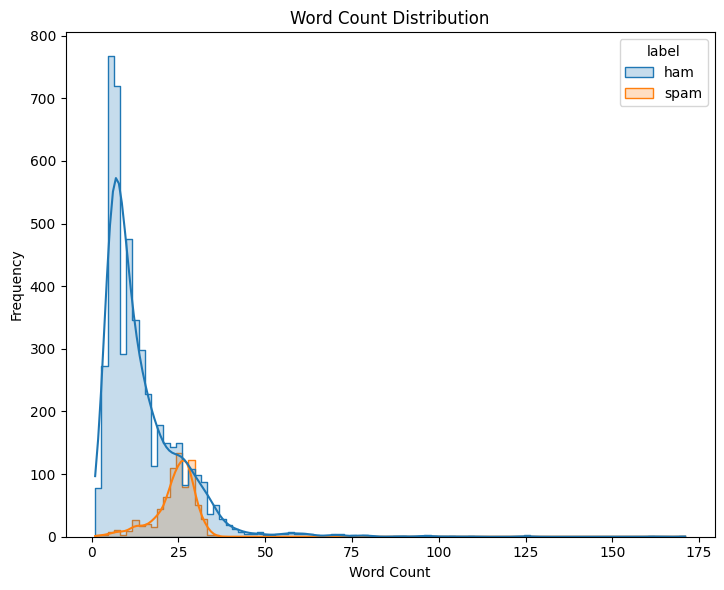

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df['word_count'] = df['message'].apply(lambda x: len(x.split()))
# Plot distributions of message lengths and word counts for spam and ham messages
plt.figure(figsize=(14, 6))
# Word Count Distribution
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='word_count', hue='label', kde=True, element='step')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

References

Sanh, V. "DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter." arXiv preprint arXiv:1910.01108 (2019).